# EMPLOYEE ATTRITION ANALYTICS

UNDERSTAND THE PROBLEM AND OBJECTIVE:
Employee attrition refers to the loss of employees through several circumstances, such as resignation and retirement. The cause of attrition may be either voluntary or involuntary. Each industry has its own standards for acceptable attrition rates. Due to the expenses associated with training new employees, any type of employee attrition is typically seen to have a monetary cost. Attrition rate at any organization for a given month is calculated as the total number of employees leaving the firm divided by the total headcount for that month.

OBJECTIVE: Identify factors influencing attrition, Predict possible attritions, Identify possible ways to retain high performers

# Understanding the data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

# 2016-18 data

In [3]:
staff_all_data=pd.read_excel(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\staff 16-18.xlsx')

In [4]:
# grouping current status and perform count over each year
Employees_yearly=staff_all_data.groupby('STAFF')['STAFF'].count()

In [5]:
Employees_yearly

STAFF
Staff 16-17    789
Staff 17-18    973
Name: STAFF, dtype: int64

In [6]:
Emp_Curr_Status = staff_all_data['Current Status'].value_counts()
Emp_Curr_Status

Active        1424
Resigned       286
New Joiner      39
Secondment      11
Sabbatical       2
Name: Current Status, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Level 1'),
  Text(2, 0, 'Level 10'),
  Text(3, 0, 'Level 2'),
  Text(4, 0, 'Level 3'),
  Text(5, 0, 'Level 4'),
  Text(6, 0, 'Level 5'),
  Text(7, 0, 'Level 6'),
  Text(8, 0, 'Level 7'),
  Text(9, 0, 'Level 8'),
  Text(10, 0, 'Level A1'),
  Text(11, 0, 'Level A2'),
  Text(12, 0, 'Level A3')])

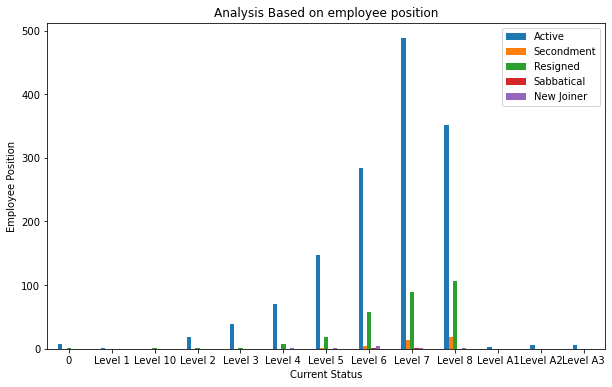

In [7]:
pd.crosstab(staff_all_data['Employee Position'], staff_all_data['Current Status']).plot(kind="bar", figsize=(10,6))
plt.title("Analysis Based on employee position")
plt.xlabel("Current Status")
plt.ylabel("Employee Position")
plt.legend(["Active","Secondment","Resigned","Sabbatical","New Joiner"])
plt.xticks(rotation=0)

In [8]:
#Replace Current status value for New Joiner, Secondment, Sabbatical with Active

In [9]:
staff_all_data['Current Status']=staff_all_data['Current Status'].replace({'New Joiner':'Active','Secondment':'Active','Sabbatical':'Active'})

In [10]:
Emp_Curr_Status = staff_all_data['Current Status'].value_counts()
Emp_Curr_Status

Active      1476
Resigned     286
Name: Current Status, dtype: int64

(array([0, 1]), [Text(0, 0, 'Active'), Text(1, 0, 'Resigned')])

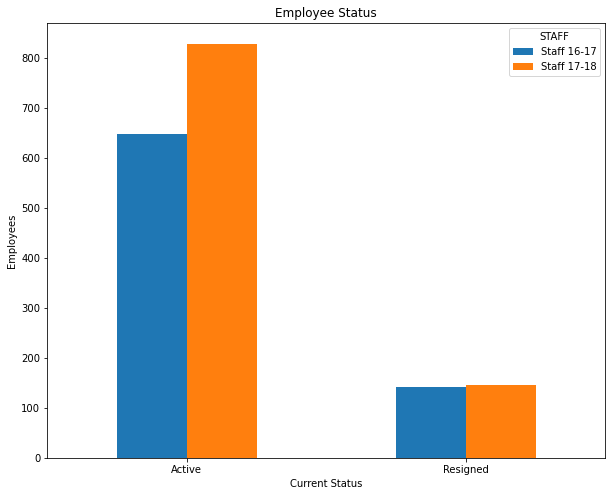

In [11]:
pd.crosstab(staff_all_data['Current Status'],staff_all_data['STAFF']).plot(kind="bar",figsize=(10,8))
plt.title("Employee Status")
plt.xlabel("Current Status")
plt.ylabel("Employees")
plt.xticks(rotation=0)

In [12]:
Emp_Pos = staff_all_data['Employee Position'].value_counts()
Emp_Pos

Level 7     594
Level 8     479
Level 6     352
Level 5     170
Level 4      80
Level 3      40
Level 2      20
0             9
Level A2      6
Level A3      6
Level A1      3
Level 1       2
Level 10      1
Name: Employee Position, dtype: int64

In [13]:
# Replacing Levels A1,A2, A3, 1, 2, 3, 4 , 10 with A1

In [14]:
staff_all_data['Employee Position']=staff_all_data['Employee Position'].replace({'Level 1':'Level A1', 'Level 2':'Level A1', 'Level 3':'Level A1','Level 4':'Level A1', 'Level A2':'Level A1', 'Level A3':'Level A1', 0:'Level A1', 'Level 10':'Level A1'})

In [15]:
Emp_Pos = staff_all_data['Employee Position'].value_counts()
Emp_Pos

Level 7     594
Level 8     479
Level 6     352
Level 5     170
Level A1    167
Name: Employee Position, dtype: int64

<AxesSubplot:title={'center':'Employee position'}>

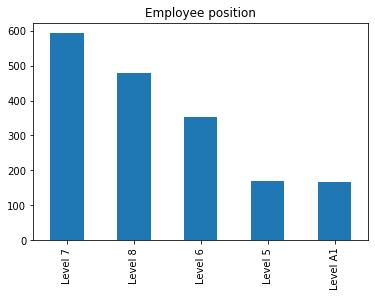

In [16]:
staff_all_data['Employee Position'].value_counts().plot(kind='bar', title = "Employee position")

In [17]:
#How employee position could be the reason for employees to leave the company or to stay in

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Level 5'),
  Text(1, 0, 'Level 6'),
  Text(2, 0, 'Level 7'),
  Text(3, 0, 'Level 8'),
  Text(4, 0, 'Level A1')])

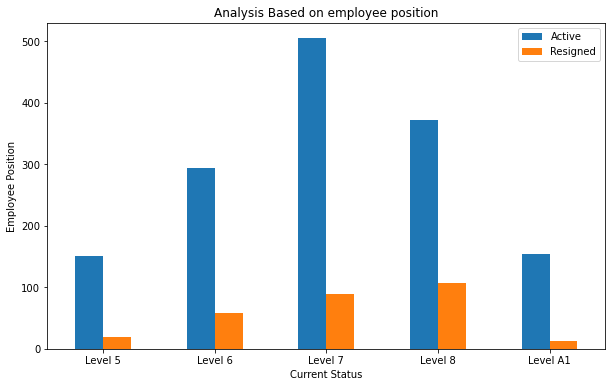

In [18]:
pd.crosstab(staff_all_data['Employee Position'], staff_all_data['Current Status']).plot(kind="bar", figsize=(10,6))
plt.title("Analysis Based on employee position")
plt.xlabel("Current Status")
plt.ylabel("Employee Position")
plt.legend(["Active","Resigned"])
plt.xticks(rotation=0)

In [19]:
Emp_categ = staff_all_data['Employee Category'].value_counts()
Emp_categ

Confirmed Staff                        1230
Serving Notice Period                   189
Staff on Probation                      155
Resigned                                145
Level 1/2                                10
Secondee-Outward-Without Pay             10
SVP/VP                                    9
Awaiting Termination                      6
Confirmed Staff (Part-Time 6 Hours)       2
Confirmed-Sabbatical                      2
Fixed term Staff                          2
Secondee-Outward-With Pay                 1
Confirmed Staff (Part-Time 4 Hours)       1
Name: Employee Category, dtype: int64

In [20]:
# Replacing Level 1/2, Secondee-Outward-Without Pay, SVP/VP,Confirmed Staff (Part-Time 6 Hours), Confirmed-Sabbatical, Fixed term Staff 
# Secondee-Outward-With Pay, Secondee-Outward-With Pay with others

In [21]:
staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Level 1/2':'others', 'Secondee-Outward-Without Pay':'others', 'SVP/VP':'others','Confirmed Staff (Part-Time 6 Hours)':'others', 'Confirmed-Sabbatical':'others', 'Fixed term Staff':'others', 'Secondee-Outward-With Pay':'others', 'Confirmed Staff (Part-Time 4 Hours)':'others'})

In [22]:
staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Staff on Probation': 'Confirmed Staff'})

In [23]:
staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Awaiting Termination': 'Resigned'})
staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Serving Notice Period': 'Resigned'})

In [24]:
Emp_categ = staff_all_data['Employee Category'].value_counts()
Emp_categ

Confirmed Staff    1385
Resigned            340
others               37
Name: Employee Category, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Confirmed Staff'), Text(1, 0, 'Resigned'), Text(2, 0, 'others')])

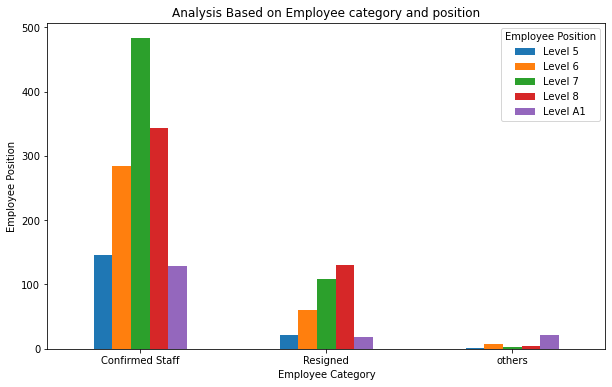

In [25]:
pd.crosstab(staff_all_data['Employee Category'], staff_all_data['Employee Position']).plot(kind="bar", figsize=(10,6))
plt.title("Analysis Based on Employee category and position")
plt.xlabel("Employee Category")
plt.ylabel("Employee Position")
plt.xticks(rotation=0)

If we see the above graph we could see that majority of the employees who resigned are from level 8 and level 7

In [26]:
Employee_Type = staff_all_data["People Group"].value_counts()
Employee_Type

Client Service Staff    1744
Support Staff             18
Name: People Group, dtype: int64

Majority of the Employement by the employees are from Client Service Staff

(array([0, 1]),
 [Text(0, 0, 'Client Service Staff'), Text(1, 0, 'Support Staff')])

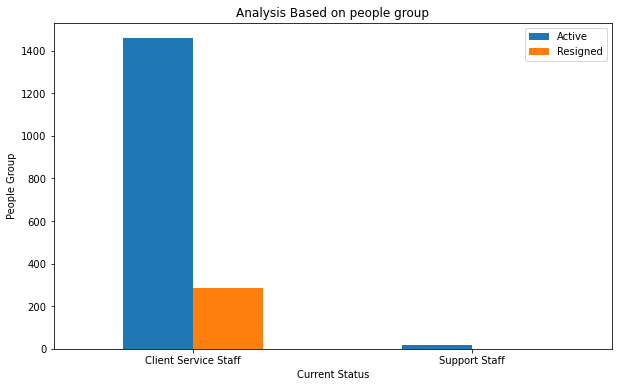

In [27]:
pd.crosstab(staff_all_data['People Group'], staff_all_data['Current Status']).plot(kind="bar", figsize=(10,6))
plt.title("Analysis Based on people group")
plt.xlabel("Current Status")
plt.ylabel("People Group")
plt.legend(["Active","Resigned"])
plt.xticks(rotation=0)

here, in the chart we can see that Majority of the employees are resigned from CLient Service Staff which is approx.300 employees

In [28]:
Emp_Center = staff_all_data["Profit Center"].value_counts()
#Emp_Center['other group']=1
print(Emp_Center)

PC - 3     630
PC - 2     509
PC - 1     415
PC - 5     108
PC - 6      90
PC - 7       5
PC - 4       1
PC - 8       1
PC - 9       1
PC - 10      1
PC - 11      1
Name: Profit Center, dtype: int64


In [29]:
# Replace PC 4, 5, 6, 7, 8, 9, 10, 11 with PC - 4

In [30]:
staff_all_data['Profit Center']=staff_all_data['Profit Center'].replace({'PC - 5':'PC - 4','PC - 6':'PC - 4','PC - 7':'PC - 4', 'PC - 8':'PC - 4', 'PC - 9':'PC - 4', 'PC - 10':'PC - 4', 'PC - 11':'PC - 4'})

In [31]:
Emp_Center = staff_all_data["Profit Center"].value_counts()
#Emp_Center['other group']=1
print(Emp_Center)

PC - 3    630
PC - 2    509
PC - 1    415
PC - 4    208
Name: Profit Center, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'PC - 1'),
  Text(1, 0, 'PC - 2'),
  Text(2, 0, 'PC - 3'),
  Text(3, 0, 'PC - 4')])

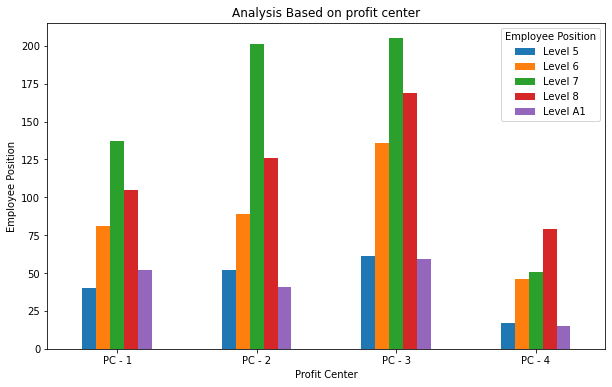

In [32]:
pd.crosstab(staff_all_data['Profit Center'], staff_all_data['Employee Position']).plot(kind="bar", figsize=(10,6))
plt.title("Analysis Based on profit center")
plt.xlabel("Profit Center")
plt.ylabel("Employee Position")
#plt.legend(["Active","Resigned"])
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'PC - 1'),
  Text(1, 0, 'PC - 2'),
  Text(2, 0, 'PC - 3'),
  Text(3, 0, 'PC - 4')])

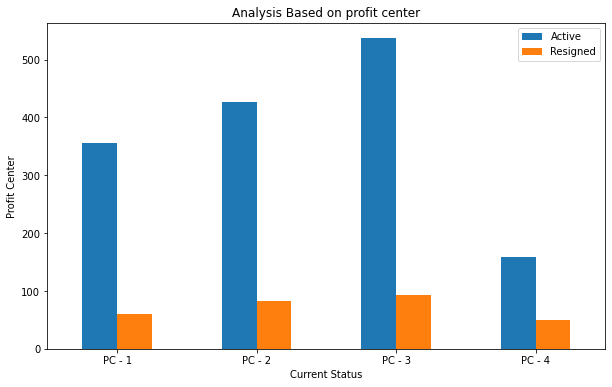

In [33]:
pd.crosstab(staff_all_data['Profit Center'], staff_all_data['Current Status']).plot(kind="bar", figsize=(10,6))
plt.title("Analysis Based on profit center")
plt.xlabel("Current Status")
plt.ylabel("Profit Center")
plt.legend(["Active","Resigned"])
plt.xticks(rotation=0)

In [34]:
Emp_loc = staff_all_data["Employee Location"].value_counts()
print(Emp_loc)

Location 1    542
Location 7    473
Location 3    425
Location 9     92
Location 2     79
Location 4     72
Location 8     51
Location 5     16
Location 6     12
Name: Employee Location, dtype: int64


In [35]:
#Replace Location 2,4, 5, 6, 8, 9 

In [36]:
staff_all_data['Employee Location']=staff_all_data['Employee Location'].replace({'Location 2':'Other Loc','Location 4':'Other Loc','Location 5':'Other Loc', 'Location 6':'Other Loc', 'Location 8':'Other Loc', 'Location 9':'Other Loc'})

In [37]:
Emp_loc = staff_all_data["Employee Location"].value_counts()
print(Emp_loc)

Location 1    542
Location 7    473
Location 3    425
Other Loc     322
Name: Employee Location, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Location 1'),
  Text(1, 0, 'Location 3'),
  Text(2, 0, 'Location 7'),
  Text(3, 0, 'Other Loc')])

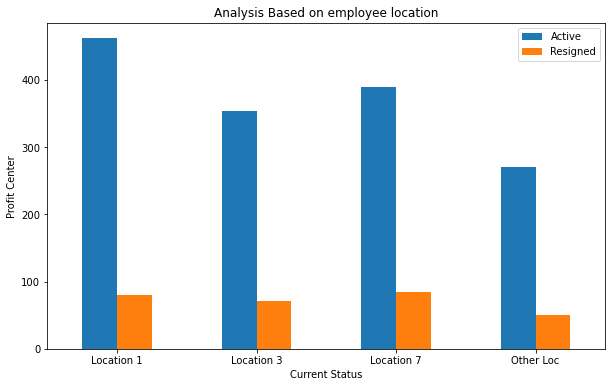

In [38]:
pd.crosstab(staff_all_data['Employee Location'], staff_all_data['Current Status']).plot(kind="bar", figsize=(10,6))
plt.title("Analysis Based on employee location")
plt.xlabel("Current Status")
plt.ylabel("Profit Center")
plt.legend(["Active","Resigned"])
plt.xticks(rotation=0)

# Terminations 15-18.xlsx EDA

In [39]:
Terminations=pd.read_excel(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\Terminations_15-18.xlsx')

In [40]:
Terminations.isnull().sum()

Employee Number               0
Employee Name                 0
YEAR of Birth                 0
Gender                        0
Leaving Reason                0
Previous Employer            72
Last Update Date              0
Latest  Available Rating    118
Emp Ref.                    282
dtype: int64

In [41]:
Terminations.shape

(293, 9)

In [42]:
Terminations['Gender'].value_counts()

M    199
F     94
Name: Gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

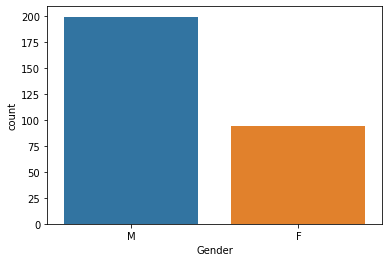

In [43]:
sns.countplot('Gender', data = Terminations)

In [44]:
Terminations['YEAR of Birth'].value_counts()

1989.0    38
1990.0    31
1988.0    29
1987.0    23
1993.0    23
1991.0    22
1994.0    17
1986.0    17
1992.0    17
1984.0    13
1985.0    13
1982.0    11
1995.0     8
1996.0     7
1983.0     6
1978.0     4
1981.0     4
1980.0     3
1979.0     3
1977.0     2
1973.0     1
1975.0     1
Name: YEAR of Birth, dtype: int64

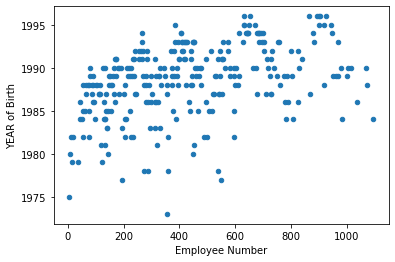

In [45]:
Terminations.plot(kind="scatter", x="Employee Number", y="YEAR of Birth")
plt.show()

In [46]:
Terminations["Leaving Reason"].value_counts()

Career Growth          127
Personal               101
Further Studies         38
Job Related             11
Others                   4
Counseled Out            4
Absconding               3
Working Conditions       2
Employee Transfer        1
Deceased                 1
Relationship Issues      1
Name: Leaving Reason, dtype: int64

The above data shows, Majority of the employees are left because of Career Growth followed by personal reasons.

# Data Cleaning and Preparation

In [47]:
staff_all_data.shape

(1762, 32)

In [48]:
staff_all_data['Current Status'].value_counts()

Active      1476
Resigned     286
Name: Current Status, dtype: int64

In [49]:
staff_all_data.isnull().sum()

STAFF                    0
Employee No              0
Profit Center            0
Employee Name            0
Employee Position        0
Employee Location        0
People Group             0
Employee Category        0
Supervisor name          0
Join Date                0
Current Status           0
Termination Date         0
Apr Utilization%         0
May Utilization%         0
Jun Utilization%         0
Jul Utilization%         0
Aug Utilization%         0
Sep Utilization%         0
Oct Utilization%         0
Nov Utilization%         0
Dec Utilization%         0
Jan Utilization%         0
Feb Utilization%         0
Mar Utilization%         0
Total Hours              0
Total Available Hours    0
Total Work Hours         0
Total Leave Hours        0
Total Training Hours     0
Total BD Hours           0
Total NC Hours           0
Total Utilization%       0
dtype: int64

# Dropping  columns before model building

In [50]:
staff_all_data.drop(['Apr Utilization%','May Utilization%', 'Jun Utilization%', 'Jul Utilization%', 'Aug Utilization%', 'Sep Utilization%', 'Oct Utilization%', 'Nov Utilization%', 'Dec Utilization%', 'Jan Utilization%', 'Feb Utilization%', 'Mar Utilization%', 'Employee No', 'Employee Name'],axis=1, inplace=True)

In [51]:
staff_all_data.drop(['Supervisor name'],axis=1, inplace=True)

There were missing values for Month Year Termination date, so we have taken it as end of the year date(03/31/2018). This replacement is done to find out No of working years in the company.

In [52]:
from datetime import datetime
from dateutil import relativedelta

In [53]:
staff_all_data['No.of Working Years']=staff_all_data['Termination Date']-staff_all_data['Join Date']

In [54]:
staff_all_data['No.of Working Years']=staff_all_data['No.of Working Years']/np.timedelta64(1,'Y')

In [55]:
staff_all_data.drop(['Join Date','Termination Date'], axis=1, inplace=True)

In [56]:
staff_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STAFF                  1762 non-null   object 
 1   Profit Center          1762 non-null   object 
 2   Employee Position      1762 non-null   object 
 3   Employee Location      1762 non-null   object 
 4   People Group           1762 non-null   object 
 5   Employee Category      1762 non-null   object 
 6   Current Status         1762 non-null   object 
 7   Total Hours            1762 non-null   int64  
 8   Total Available Hours  1762 non-null   float64
 9   Total Work Hours       1762 non-null   float64
 10  Total Leave Hours      1762 non-null   float64
 11  Total Training Hours   1762 non-null   float64
 12  Total BD Hours         1762 non-null   float64
 13  Total NC Hours         1762 non-null   float64
 14  Total Utilization%     1762 non-null   float64
 15  No.o

In [57]:
staff_all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Hours,1762.0,1650.238365,643.610294,0.00000,1400.000000,2080.000000,2080.000000,2088.000000
Total Available Hours,1762.0,1436.809132,579.894300,-40.00000,1160.625000,1747.750000,1852.000000,2088.000000
Total Work Hours,1762.0,1084.965897,640.804918,-42.00000,528.000000,1209.250000,1640.500000,2669.000000
Total Leave Hours,1762.0,183.500284,164.025275,0.00000,97.000000,172.500000,240.000000,2080.000000
Total Training Hours,1762.0,30.521459,31.246483,-11.00000,6.500000,22.500000,44.000000,169.000000
Total BD Hours,1762.0,69.501135,262.206277,-24.00000,0.000000,0.000000,0.000000,2015.000000
Total NC Hours,1762.0,364.052202,388.732284,-28.50000,80.000000,243.000000,504.000000,2458.500000
Total Utilization%,1762.0,0.717678,0.345335,-0.04918,0.528533,0.828401,0.953719,6.000000
No.of Working Years,1762.0,2.897587,2.702941,0.00000,1.084211,2.162947,3.750933,19.751261


array([[<AxesSubplot:title={'center':'Total Hours'}>,
        <AxesSubplot:title={'center':'Total Available Hours'}>,
        <AxesSubplot:title={'center':'Total Work Hours'}>],
       [<AxesSubplot:title={'center':'Total Leave Hours'}>,
        <AxesSubplot:title={'center':'Total Training Hours'}>,
        <AxesSubplot:title={'center':'Total BD Hours'}>],
       [<AxesSubplot:title={'center':'Total NC Hours'}>,
        <AxesSubplot:title={'center':'Total Utilization%'}>,
        <AxesSubplot:title={'center':'No.of Working Years'}>]],
      dtype=object)

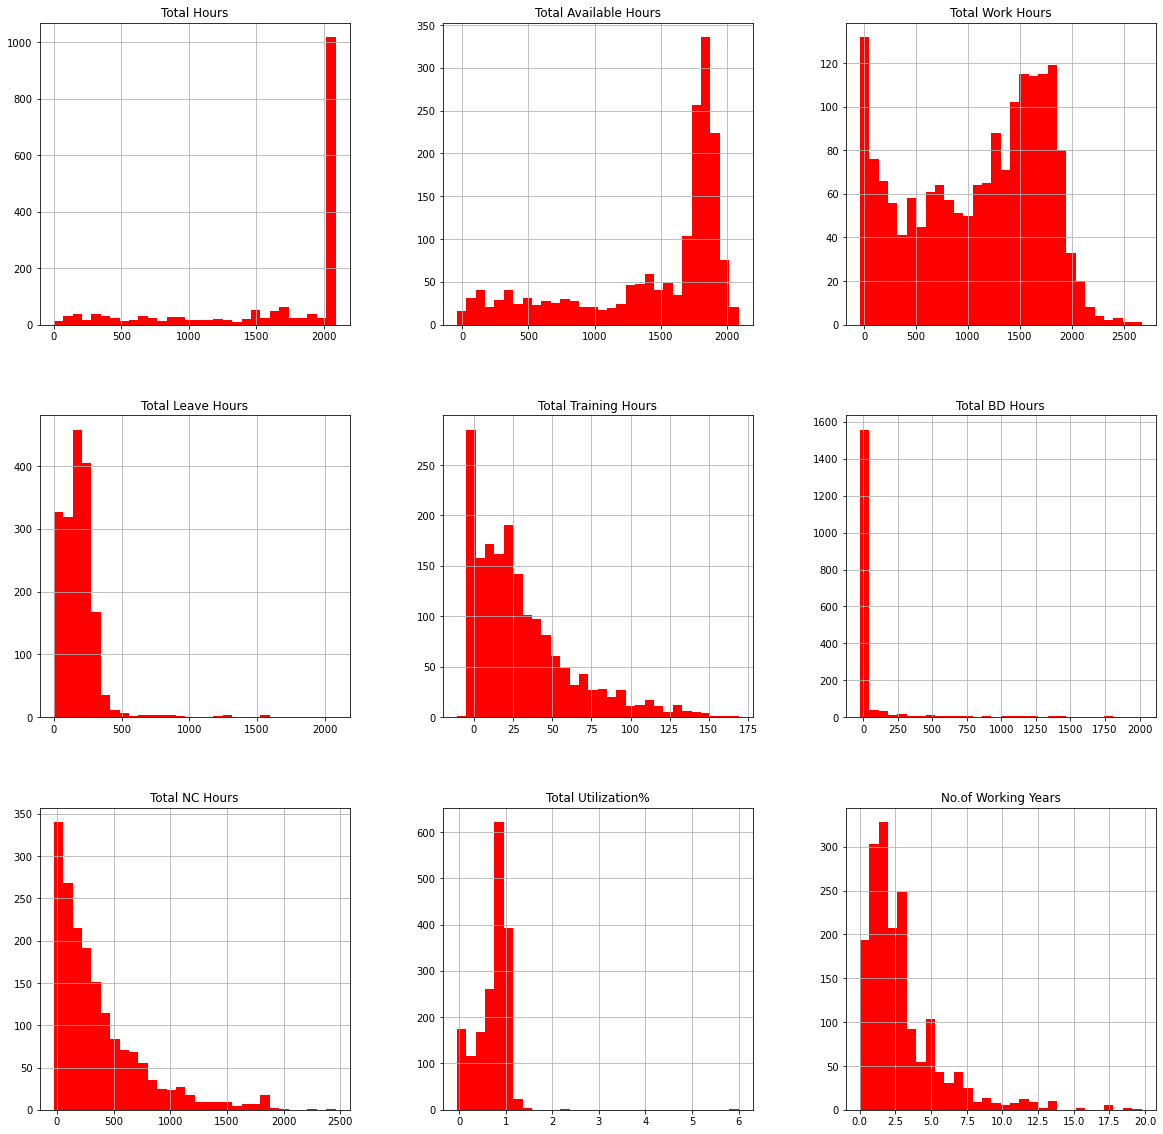

In [58]:
staff_all_data.hist(bins = 30, figsize = (20,20), color = 'r')

<AxesSubplot:>

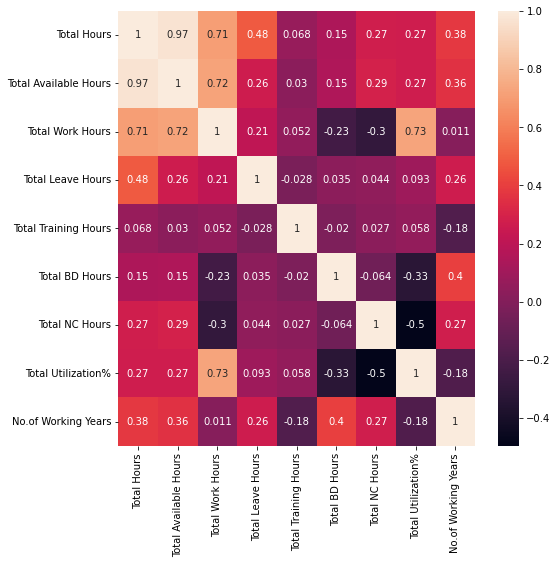

In [59]:
correlations = staff_all_data.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(correlations, annot = True)

<Figure size 720x720 with 0 Axes>

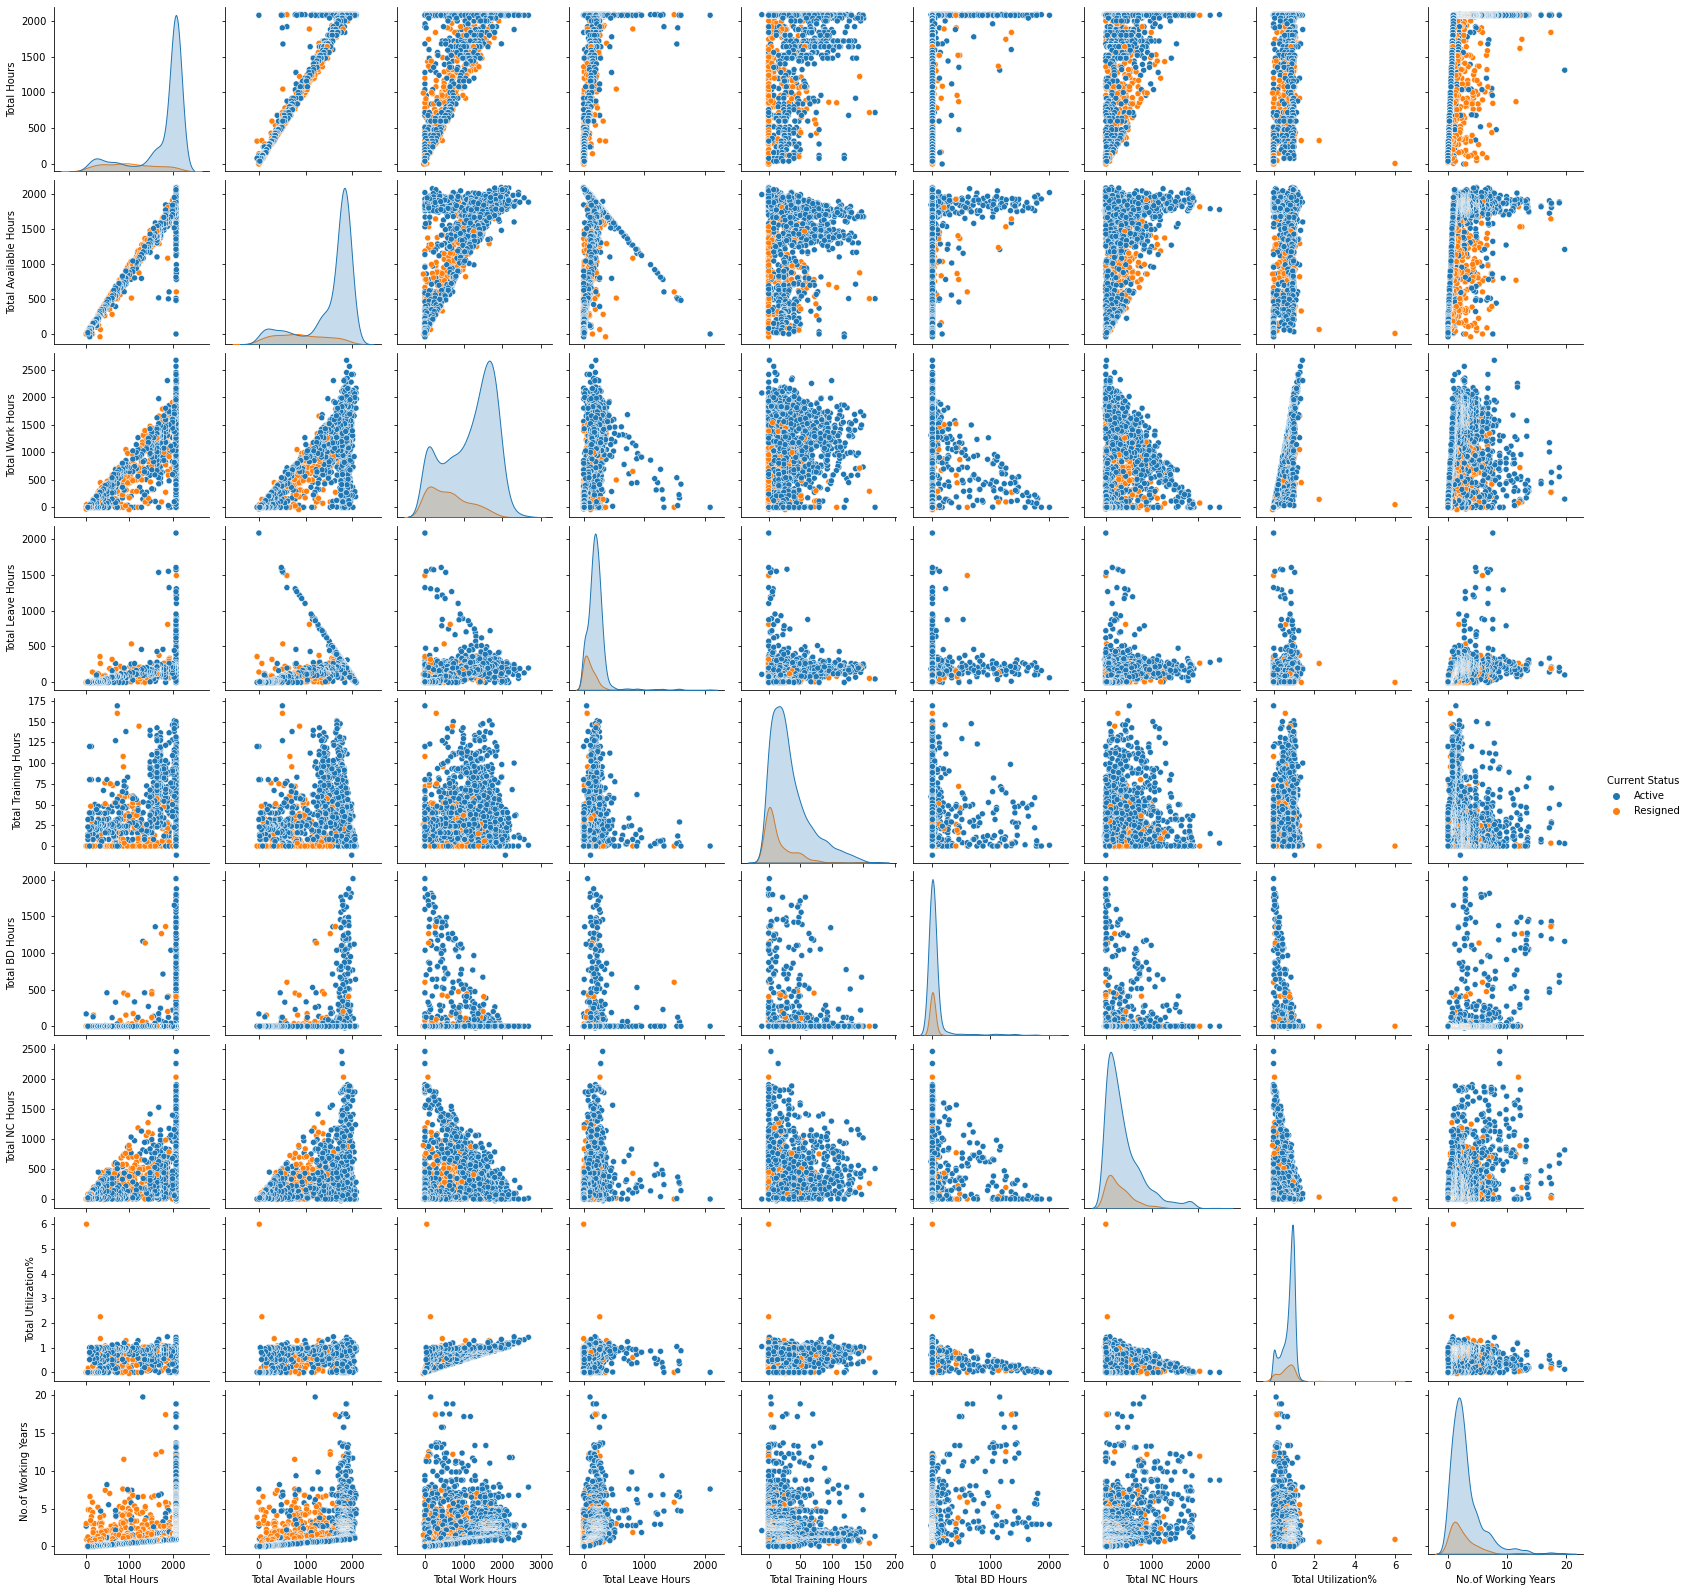

In [60]:
plt.figure(figsize=(10,10))
sns.pairplot(staff_all_data, hue="Current Status")
plt.show()

In [61]:
# Cuurent Status - modified the Dtype - object to int64

In [62]:
staff_all_data['Current Status']=staff_all_data['Current Status'].apply(lambda x:1 if x=='Active' else 0)

In [63]:
staff_all_data['STAFF']=staff_all_data['STAFF'].apply(lambda x:1 if x=='Staff 16-17' else 0)

In [64]:
staff_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STAFF                  1762 non-null   int64  
 1   Profit Center          1762 non-null   object 
 2   Employee Position      1762 non-null   object 
 3   Employee Location      1762 non-null   object 
 4   People Group           1762 non-null   object 
 5   Employee Category      1762 non-null   object 
 6   Current Status         1762 non-null   int64  
 7   Total Hours            1762 non-null   int64  
 8   Total Available Hours  1762 non-null   float64
 9   Total Work Hours       1762 non-null   float64
 10  Total Leave Hours      1762 non-null   float64
 11  Total Training Hours   1762 non-null   float64
 12  Total BD Hours         1762 non-null   float64
 13  Total NC Hours         1762 non-null   float64
 14  Total Utilization%     1762 non-null   float64
 15  No.o

In [65]:
staff_all_data.isnull().sum()

STAFF                    0
Profit Center            0
Employee Position        0
Employee Location        0
People Group             0
Employee Category        0
Current Status           0
Total Hours              0
Total Available Hours    0
Total Work Hours         0
Total Leave Hours        0
Total Training Hours     0
Total BD Hours           0
Total NC Hours           0
Total Utilization%       0
No.of Working Years      0
dtype: int64

In [66]:
# splitting the data of 2016-17 and 17-18 of the dataset

train_data = staff_all_data[staff_all_data['STAFF'] == 1]
test_data = staff_all_data[staff_all_data['STAFF'] == 0]

In [67]:
train_data=train_data.drop(['STAFF'],axis=1)
test_data=test_data.drop(['STAFF'],axis=1)

In [68]:
# sending this train_data and test_data to a dataframe and converting it to the csv file.

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [69]:
#Segregating the input and the output variable by dropping 
# the resigned status column from the cr_training dummy dataset
cr_train_dummy_cod=pd.get_dummies(train_data) 

cr_train_inp=cr_train_dummy_cod
cr_train_out=cr_train_dummy_cod['Current Status']

In [70]:
cr_test_dummy_cod=pd.get_dummies(test_data) 

cr_test_inp = cr_test_dummy_cod
cr_test_out=cr_test_dummy_cod['Current Status']

In [71]:
cr_train_inp = cr_train_inp.reindex(labels=cr_test_inp.columns,axis=1)
cr_train_dummy_cod = cr_train_dummy_cod.reindex(labels=cr_test_dummy_cod.columns,axis=1)

In [72]:
stmp='Employee Category_Resigned'
cr_train_inp[stmp].fillna(0, inplace=True)
cr_train_inp[stmp]=cr_train_inp[stmp].astype(np.uint8)
cr_train_dummy_cod[stmp].fillna(0, inplace=True)
cr_train_dummy_cod[stmp]=cr_train_dummy_cod[stmp].astype(np.uint8)
cr_train_dummy_cod.info()
cr_train_inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 0 to 788
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Current Status                     789 non-null    int64  
 1   Total Hours                        789 non-null    int64  
 2   Total Available Hours              789 non-null    float64
 3   Total Work Hours                   789 non-null    float64
 4   Total Leave Hours                  789 non-null    float64
 5   Total Training Hours               789 non-null    float64
 6   Total BD Hours                     789 non-null    float64
 7   Total NC Hours                     789 non-null    float64
 8   Total Utilization%                 789 non-null    float64
 9   No.of Working Years                789 non-null    float64
 10  Profit Center_PC - 1               789 non-null    uint8  
 11  Profit Center_PC - 2               789 non-null    uint8  

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=5000)
log_model.fit(cr_train_inp,cr_train_out)

LogisticRegression(max_iter=5000)

In [74]:
cr_train_inp1 = cr_train_inp
cr_train_inp1 = cr_train_inp1.drop(['Current Status'],axis=1)

In [75]:
#statsmodel - logit

#import statsmodels.api as sm
#logit_model=sm.Logit(cr_train_out,cr_train_inp1)
#result=logit_model.fit()
#print(result.summary2())

In [76]:
prediction=log_model.predict(cr_test_inp)
prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [77]:
#Putting the validation data Target variable in a new object "Valid_Current_Status"
Valid_Current_Status=cr_test_dummy_cod['Current Status']
Valid_Current_Status.value_counts()

1    828
0    145
Name: Current Status, dtype: int64

In [78]:
#cr_test_dummy_cod = cr_test_dummy_cod.drop(['Current Status'],axis=1)

In [79]:
log_model.predict_proba(cr_test_dummy_cod)

array([[0.00362467, 0.99637533],
       [0.00627971, 0.99372029],
       [0.00294888, 0.99705112],
       ...,
       [0.01914426, 0.98085574],
       [0.01592969, 0.98407031],
       [0.03468467, 0.96531533]])

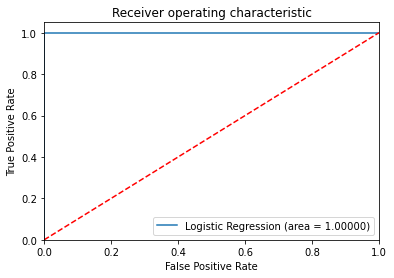

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Valid_Current_Status, log_model.predict(cr_test_dummy_cod))
fpr, tpr, thresholds = roc_curve(Valid_Current_Status, log_model.predict_proba(cr_test_dummy_cod)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
prediction_test=log_model.predict(cr_test_dummy_cod)
prediction_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [82]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(Valid_Current_Status,prediction)

array([[145,   0],
       [  0, 828]], dtype=int64)

In [235]:
(145/828)*100 

17.51207729468599

In [85]:
# Reporting the final accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(Valid_Current_Status,prediction)*100

100.0

In [86]:
# Add a column for the predicted class in the test data set
test_data['Predictions']=prediction_test

In [87]:
test_data.describe

<bound method NDFrame.describe of      Profit Center Employee Position Employee Location          People Group  \
789         PC - 1          Level A1        Location 3  Client Service Staff   
790         PC - 2          Level A1        Location 7  Client Service Staff   
791         PC - 2          Level A1        Location 7  Client Service Staff   
792         PC - 3          Level A1        Location 1  Client Service Staff   
793         PC - 1          Level A1        Location 3  Client Service Staff   
...            ...               ...               ...                   ...   
1757        PC - 1           Level 8        Location 3  Client Service Staff   
1758        PC - 1           Level 7        Location 3  Client Service Staff   
1759        PC - 3           Level 8        Location 1  Client Service Staff   
1760        PC - 3           Level 7        Location 1  Client Service Staff   
1761        PC - 2           Level 8        Location 7  Client Service Staff   

     

# SMOTE

In [88]:
staff_consolidated_data=pd.read_excel(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\staff_consolidated_16_18.xlsx')

In [89]:
staff_consolidated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1000 non-null   int64  
 1   Employee Name          1000 non-null   object 
 2   Total Hours            1000 non-null   int64  
 3   Total Available Hours  1000 non-null   float64
 4   Total Work Hours       1000 non-null   float64
 5   Total Leave Hours      1000 non-null   float64
 6   Total Training Hours   1000 non-null   float64
 7   Total BD Hours         1000 non-null   float64
 8   Total NC Hours         1000 non-null   float64
 9   Total Utilization%     1000 non-null   float64
 10  No of Working Years    1000 non-null   float64
 11  Profit Center          1000 non-null   object 
 12  Employee Position      1000 non-null   object 
 13  Employee Location      1000 non-null   object 
 14  Employee Category      1000 non-null   object 
 15  Super

In [90]:
model_data = staff_consolidated_data

In [91]:
# Dropping some columns

model_data.drop(['Supervisor name'],axis=1, inplace=True)
model_data.drop(['Employee Name'],axis=1, inplace=True)
model_data.drop(['Employee No'],axis=1, inplace=True)

In [92]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total Hours            1000 non-null   int64  
 1   Total Available Hours  1000 non-null   float64
 2   Total Work Hours       1000 non-null   float64
 3   Total Leave Hours      1000 non-null   float64
 4   Total Training Hours   1000 non-null   float64
 5   Total BD Hours         1000 non-null   float64
 6   Total NC Hours         1000 non-null   float64
 7   Total Utilization%     1000 non-null   float64
 8   No of Working Years    1000 non-null   float64
 9   Profit Center          1000 non-null   object 
 10  Employee Position      1000 non-null   object 
 11  Employee Location      1000 non-null   object 
 12  Employee Category      1000 non-null   object 
 13  People Group           1000 non-null   object 
 14  Current Status         1000 non-null   object 
dtypes: fl

In [93]:
model_data['Current Status']=model_data['Current Status'].replace({'New Joiner':'Active','Secondment':'Active','Sabbatical':'Active'})

In [94]:
model_data['Employee Position']=model_data['Employee Position'].replace({'Level 1':'Level A1', 'Level 2':'Level A1', 'Level 3':'Level A1','Level 4':'Level A1', 'Level A2':'Level A1', 'Level A3':'Level A1', 0:'Level A1', 'Level 10':'Level A1'})

model_data['Employee Category']=model_data['Employee Category'].replace({'Level 1/2':'others', 'Secondee-Outward-Without Pay':'others', 'SVP/VP':'others','Confirmed Staff (Part-Time 6 Hours)':'others', 'Confirmed-Sabbatical':'others', 'Fixed term Staff':'others', 'Secondee-Outward-With Pay':'others', 'Confirmed Staff (Part-Time 4 Hours)':'others'})

model_data['Employee Category']=model_data['Employee Category'].replace({'Staff on Probation': 'Confirmed Staff'})

model_data['Employee Category']=model_data['Employee Category'].replace({'Awaiting Termination': 'Resigned'})

model_data['Employee Category']=model_data['Employee Category'].replace({'Serving Notice Period': 'Resigned'})

model_data['Profit Center']=model_data['Profit Center'].replace({'PC - 5':'PC - 4','PC - 6':'PC - 4','PC - 7':'PC - 4', 'PC - 8':'PC - 4', 'PC - 9':'PC - 4', 'PC - 10':'PC - 4', 'PC - 11':'PC - 4'})

model_data['Employee Location']=model_data['Employee Location'].replace({'Location 2':'Other Loc','Location 4':'Other Loc','Location 5':'Other Loc', 'Location 6':'Other Loc', 'Location 8':'Other Loc', 'Location 9':'Other Loc'})

In [95]:
model_data1=pd.get_dummies(model_data) 

In [96]:
model_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Hours                        1000 non-null   int64  
 1   Total Available Hours              1000 non-null   float64
 2   Total Work Hours                   1000 non-null   float64
 3   Total Leave Hours                  1000 non-null   float64
 4   Total Training Hours               1000 non-null   float64
 5   Total BD Hours                     1000 non-null   float64
 6   Total NC Hours                     1000 non-null   float64
 7   Total Utilization%                 1000 non-null   float64
 8   No of Working Years                1000 non-null   float64
 9   Profit Center_PC - 1               1000 non-null   uint8  
 10  Profit Center_PC - 2               1000 non-null   uint8  
 11  Profit Center_PC - 3               1000 non-null   uint8 

In [97]:
a = 'Current Status_Active'
b = 'Current Status_Resigned'

X = model_data1.drop([a], axis=1)
X = model_data1.drop([b], axis=1)

y = staff_consolidated_data['Current Status']

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [100]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 28)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 28)
Number transactions y_test dataset:  (300,)


In [101]:
# logistic regression object
#lr = LogisticRegression(penalty='l1',solver='saga', max_iter=5000)
lr = LogisticRegression(solver='lbfgs', max_iter=5000)
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       250
    Resigned       0.98      1.00      0.99        50

    accuracy                           1.00       300
   macro avg       0.99      1.00      0.99       300
weighted avg       1.00      1.00      1.00       300



In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
lr_predict_train =lr.predict(X_train)
lr_predict_test=lr.predict(X_test)

In [104]:
train_accuracy=accuracy_score(y_train,lr_predict_train)
test_accuracy=accuracy_score(y_test,lr_predict_test)
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 1.0
test_accuracy: 0.9966666666666667


In [105]:
print(confusion_matrix(y_test,lr_predict_test))

[[249   1]
 [  0  50]]


In [234]:
(50/249) *100

20.080321285140563

In [106]:
print(classification_report(y_test,lr_predict_test))

              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       250
    Resigned       0.98      1.00      0.99        50

    accuracy                           1.00       300
   macro avg       0.99      1.00      0.99       300
weighted avg       1.00      1.00      1.00       300



In [107]:
y_test1=y_test.apply(lambda x:1 if x=='Active' else 0)
y_test1

993    1
859    1
298    1
553    1
672    1
      ..
167    0
998    1
984    1
491    1
10     0
Name: Current Status, Length: 300, dtype: int64

In [108]:
df_a = pd.DataFrame(lr_predict_test)
lr_predict_test1 = df_a[0].apply(lambda x:1 if x=='Active' else 0)

In [109]:
from sklearn.metrics import roc_auc_score
log_roc_auc = roc_auc_score (y_test1, lr_predict_test1)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, lr.predict_proba(X_test) [:,1])

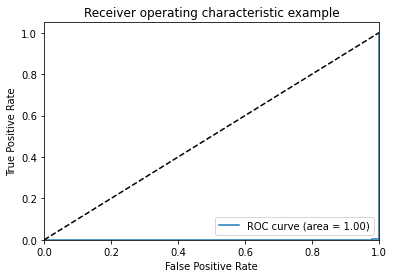

Logistic AUC = 1.00 


In [110]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()
print("Logistic AUC = %2.2f " % log_roc_auc )

In [111]:
#!pip install imbalanced-learn==0.6.0
#!pip install scikit-learn==0.22.1

In [112]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 

After OverSampling, the shape of train_X: (1168, 28)
After OverSampling, the shape of train_y: (1168,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [113]:
#Prediction and Recall

In [114]:
lr1 = LogisticRegression(solver='lbfgs', max_iter=5000)
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       250
    Resigned       0.98      1.00      0.99        50

    accuracy                           1.00       300
   macro avg       0.99      1.00      0.99       300
weighted avg       1.00      1.00      1.00       300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
#NearMiss Algorithm

In [116]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 0
Before Undersampling, counts of label '0': 0 

After Undersampling, the shape of train_X: (232, 28)
After Undersampling, the shape of train_y: (232,) 

After Undersampling, counts of label '1': 0
After Undersampling, counts of label '0': 0


In [117]:
# train the model on train set
lr2 = LogisticRegression(solver='lbfgs', max_iter=5000)
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Active       1.00      0.91      0.95       250
    Resigned       0.68      1.00      0.81        50

    accuracy                           0.92       300
   macro avg       0.84      0.95      0.88       300
weighted avg       0.95      0.92      0.93       300



In [118]:
print(confusion_matrix(y_test, predictions))

[[227  23]
 [  0  50]]


In [233]:
(50/227)*100

22.026431718061673

#xgb

# xgb - now splitting the data 2016-17 and 2017-18 and converting it to the numerical data from categorical data.
# train_data is the name given to the dataframe for the data 2016-17 and train_data for the 2017-18 data.

Applying numerical values to the STAFF column as Staff utilization 2016-17 as 1 and staff utilization 17-18 as 0

In [119]:
staff_all_data=pd.read_excel(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\staff 16-18.xlsx')

In [120]:
staff_all_data['Current Status']=staff_all_data['Current Status'].replace({'New Joiner':'Active','Secondment':'Active','Sabbatical':'Active'})

staff_all_data['Employee Position']=staff_all_data['Employee Position'].replace({'Level 1':'Level A1', 'Level 2':'Level A1', 'Level 3':'Level A1','Level 4':'Level A1', 'Level A2':'Level A1', 'Level A3':'Level A1', 0:'Level A1', 'Level 10':'Level A1'})

staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Level 1/2':'others', 'Secondee-Outward-Without Pay':'others', 'SVP/VP':'others','Confirmed Staff (Part-Time 6 Hours)':'others', 'Confirmed-Sabbatical':'others', 'Fixed term Staff':'others', 'Secondee-Outward-With Pay':'others', 'Confirmed Staff (Part-Time 4 Hours)':'others'})

staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Staff on Probation': 'Confirmed Staff'})

staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Awaiting Termination': 'Resigned'})

staff_all_data['Employee Category']=staff_all_data['Employee Category'].replace({'Serving Notice Period': 'Resigned'})

staff_all_data['Profit Center']=staff_all_data['Profit Center'].replace({'PC - 5':'PC - 4','PC - 6':'PC - 4','PC - 7':'PC - 4', 'PC - 8':'PC - 4', 'PC - 9':'PC - 4', 'PC - 10':'PC - 4', 'PC - 11':'PC - 4'})

staff_all_data['Employee Location']=staff_all_data['Employee Location'].replace({'Location 2':'Other Loc','Location 4':'Other Loc','Location 5':'Other Loc', 'Location 6':'Other Loc', 'Location 8':'Other Loc', 'Location 9':'Other Loc'})


In [121]:
staff_all_data['STAFF']=staff_all_data['STAFF'].apply(lambda x:1 if x=='Staff 16-17' else 0)
staff_all_data

,STAFF,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Apr Utilization%,May Utilization%,Jun Utilization%,Jul Utilization%,Aug Utilization%,Sep Utilization%,Oct Utilization%,Nov Utilization%,Dec Utilization%,Jan Utilization%,Feb Utilization%,Mar Utilization%,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%
0,1,1,PC - 1,Rochette Jilleen,Level A1,Location 3,Client Service Staff,others,Idalina Lauraine,2000-09-30,Active,2018-03-31,0.343750,0.190476,0.078947,0.514925,0.119048,0.560345,0.353333,0.243421,0.617647,0.472222,0.333333,0.525714,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941
1,1,2,PC - 2,Daryl Natalina,Level A1,Location 7,Client Service Staff,others,Idalina Lauraine,1999-05-31,Active,2018-03-31,0.355263,0.157895,0.500000,0.187500,0.202381,0.188406,0.068750,0.175000,0.397059,0.176829,0.000000,0.991848,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165
2,1,3,PC - 2,Annnora Gabrielle,Level A1,Location 7,Client Service Staff,others,Idalina Lauraine,2001-01-31,Active,2018-03-31,0.409722,0.285326,0.255952,0.508982,0.743750,0.266447,0.411184,0.304762,0.911765,0.615132,0.378289,1.264368,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102
3,1,4,PC - 3,Barbee Joey,Level A1,Location 1,Client Service Staff,others,Idalina Lauraine,2000-09-30,Active,2018-03-31,0.111842,0.131250,0.153409,0.343234,0.125000,0.076271,0.032895,0.068750,0.014706,0.150470,0.208861,0.301136,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488
4,1,5,PC - 4,Idalina Lauraine,Level A1,Location 3,Client Service Staff,others,Abagail Druci,1998-06-30,Active,2018-03-31,0.023810,0.065476,0.079545,0.109091,0.087500,0.047619,0.050000,1.050000,0.300000,0.000000,0.000000,0.000000,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0,1103,PC - 1,Brock Walsh,Level 8,Location 3,Client Service Staff,Confirmed Staff,Gavra Kayle,2018-03-31,Active,2018-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80,-40.0,0.0,0.0,120.0,0.0,0.0,0.000000
1758,0,1111,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Confirmed Staff,Lee Alfie,2018-03-31,Active,2018-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40,24.0,0.0,8.0,8.0,0.0,24.0,0.000000
1759,0,1104,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Confirmed Staff,Donette Verne,2018-03-31,Active,2018-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40,9.0,0.0,8.0,23.0,0.0,9.0,0.000000
1760,0,1105,PC - 3,Andy Mejia,Level 7,Location 1,Client Service Staff,Confirmed Staff,Tiena Hatti,2018-03-31,Active,2018-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40,0.0,0.0,8.0,32.0,0.0,0.0,0.000000


In [122]:
staff_all_data.drop(['Apr Utilization%','May Utilization%', 'Jun Utilization%', 'Jul Utilization%', 'Aug Utilization%', 'Sep Utilization%', 'Oct Utilization%', 'Nov Utilization%', 'Dec Utilization%', 'Jan Utilization%', 'Feb Utilization%', 'Mar Utilization%', 'Employee No', 'Employee Name'],axis=1, inplace=True)

staff_all_data.drop(['Supervisor name'],axis=1, inplace=True)

from datetime import datetime
from dateutil import relativedelta

staff_all_data['No.of Working Years']=staff_all_data['Termination Date']-staff_all_data['Join Date']

staff_all_data['No.of Working Years']=staff_all_data['No.of Working Years']/np.timedelta64(1,'Y')

staff_all_data.drop(['Join Date','Termination Date'], axis=1, inplace=True)

In [123]:
staff_all_data['Current Status']=staff_all_data['Current Status'].apply(lambda x:1 if x=='Resigned' else 0)

In [124]:
staff_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STAFF                  1762 non-null   int64  
 1   Profit Center          1762 non-null   object 
 2   Employee Position      1762 non-null   object 
 3   Employee Location      1762 non-null   object 
 4   People Group           1762 non-null   object 
 5   Employee Category      1762 non-null   object 
 6   Current Status         1762 non-null   int64  
 7   Total Hours            1762 non-null   int64  
 8   Total Available Hours  1762 non-null   float64
 9   Total Work Hours       1762 non-null   float64
 10  Total Leave Hours      1762 non-null   float64
 11  Total Training Hours   1762 non-null   float64
 12  Total BD Hours         1762 non-null   float64
 13  Total NC Hours         1762 non-null   float64
 14  Total Utilization%     1762 non-null   float64
 15  No.o

In [125]:
# splitting the data of 2016-17 and 17-18 of the dataset

train_data = staff_all_data[staff_all_data['STAFF'] == 1]
test_data = staff_all_data[staff_all_data['STAFF'] == 0]

In [126]:
# sending this train_data and test_data to a dataframe and converting it to the csv file.

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [127]:
train_data.to_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\train_data.csv',index=False)

In [128]:
test_data.to_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\test_data.csv',index=False)

In [129]:
#read the csv file to the programme

train = pd.read_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\train_data.csv')

train

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,17.497964
1,1,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,18.834062
2,1,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,17.161201
3,1,PC - 3,Level A1,Location 1,Client Service Staff,others,0,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,17.497964
4,1,PC - 4,Level A1,Location 3,Client Service Staff,others,0,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,19.751261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,1,PC - 4,Level 8,Location 1,Client Service Staff,Confirmed Staff,0,80,32.0,32.0,8.0,40.0,0.0,0.0,1.000000,0.999336
785,1,PC - 3,Level 8,Location 1,Client Service Staff,Confirmed Staff,0,80,40.0,0.0,0.0,40.0,0.0,40.0,0.000000,0.999336
786,1,PC - 4,Level 8,Location 3,Client Service Staff,Confirmed Staff,0,80,72.0,0.0,0.0,8.0,0.0,72.0,0.000000,0.999336
787,1,PC - 3,Level 7,Other Loc,Client Service Staff,Confirmed Staff,0,40,32.0,0.0,8.0,0.0,0.0,32.0,0.000000,0.999336


In [130]:
test = pd.read_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\test_data.csv')

test

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,0,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,17.497964
1,0,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,18.834062
2,0,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,17.161201
3,0,PC - 3,Level A1,Location 1,Client Service Staff,Resigned,1,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,17.413089
4,0,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2080,1812.0,428.0,260.0,8.0,1237.0,470.0,0.236203,15.751179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,PC - 1,Level 8,Location 3,Client Service Staff,Confirmed Staff,0,80,-40.0,0.0,0.0,120.0,0.0,0.0,0.000000,0.000000
969,0,PC - 1,Level 7,Location 3,Client Service Staff,Confirmed Staff,0,40,24.0,0.0,8.0,8.0,0.0,24.0,0.000000,0.000000
970,0,PC - 3,Level 8,Location 1,Client Service Staff,Confirmed Staff,0,40,9.0,0.0,8.0,23.0,0.0,9.0,0.000000,0.000000
971,0,PC - 3,Level 7,Location 1,Client Service Staff,Confirmed Staff,0,40,0.0,0.0,8.0,32.0,0.0,0.0,0.000000,0.000000


In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STAFF                  789 non-null    int64  
 1   Profit Center          789 non-null    object 
 2   Employee Position      789 non-null    object 
 3   Employee Location      789 non-null    object 
 4   People Group           789 non-null    object 
 5   Employee Category      789 non-null    object 
 6   Current Status         789 non-null    int64  
 7   Total Hours            789 non-null    int64  
 8   Total Available Hours  789 non-null    float64
 9   Total Work Hours       789 non-null    float64
 10  Total Leave Hours      789 non-null    float64
 11  Total Training Hours   789 non-null    float64
 12  Total BD Hours         789 non-null    float64
 13  Total NC Hours         789 non-null    float64
 14  Total Utilization%     789 non-null    float64
 15  No.of 

In [132]:
train1=train.copy()

In [133]:
cat_cols=train.select_dtypes(include='object').columns

cat_cols

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category'],
      dtype='object')

In [134]:
train[cat_cols]=train[cat_cols].apply(lambda x:x.astype('category'))

In [135]:
train[cat_cols]=train[cat_cols].apply(lambda x:x.cat.codes)

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STAFF                  789 non-null    int64  
 1   Profit Center          789 non-null    int8   
 2   Employee Position      789 non-null    int8   
 3   Employee Location      789 non-null    int8   
 4   People Group           789 non-null    int8   
 5   Employee Category      789 non-null    int8   
 6   Current Status         789 non-null    int64  
 7   Total Hours            789 non-null    int64  
 8   Total Available Hours  789 non-null    float64
 9   Total Work Hours       789 non-null    float64
 10  Total Leave Hours      789 non-null    float64
 11  Total Training Hours   789 non-null    float64
 12  Total BD Hours         789 non-null    float64
 13  Total NC Hours         789 non-null    float64
 14  Total Utilization%     789 non-null    float64
 15  No.of 

In [137]:
train.head()

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,0,4,1,0,2,0,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,17.497964
1,1,1,4,2,0,2,0,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,18.834062
2,1,1,4,2,0,2,0,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,17.161201
3,1,2,4,0,0,2,0,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,17.497964
4,1,3,4,1,0,2,0,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,19.751261


In [138]:
X=train[cat_cols]
Y=train['Current Status']

Dummy Encoding

In [139]:
train1.head()

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,17.497964
1,1,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,18.834062
2,1,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,17.161201
3,1,PC - 3,Level A1,Location 1,Client Service Staff,others,0,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,17.497964
4,1,PC - 4,Level A1,Location 3,Client Service Staff,others,0,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,19.751261


In [140]:
cat_col=train1.select_dtypes(include='object').columns
cat_col

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category'],
      dtype='object')

In [141]:
Dummy=pd.get_dummies(train1[cat_col])

In [142]:
Dummy.head()

,Profit Center_PC - 1,Profit Center_PC - 2,Profit Center_PC - 3,Profit Center_PC - 4,Employee Position_Level 5,Employee Position_Level 6,Employee Position_Level 7,Employee Position_Level 8,Employee Position_Level A1,Employee Location_Location 1,Employee Location_Location 3,Employee Location_Location 7,Employee Location_Other Loc,People Group_Client Service Staff,People Group_Support Staff,Employee Category_Confirmed Staff,Employee Category_Resigned,Employee Category_others
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [143]:
traindata=pd.concat([Dummy,train1],axis=1)

In [144]:
traindata=traindata.drop(columns=cat_col,axis=1)

In [145]:
traindata.head()

,Profit Center_PC - 1,Profit Center_PC - 2,Profit Center_PC - 3,Profit Center_PC - 4,Employee Position_Level 5,Employee Position_Level 6,Employee Position_Level 7,Employee Position_Level 8,Employee Position_Level A1,Employee Location_Location 1,Employee Location_Location 3,Employee Location_Location 7,Employee Location_Other Loc,People Group_Client Service Staff,People Group_Support Staff,Employee Category_Confirmed Staff,Employee Category_Resigned,Employee Category_others,STAFF,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,17.497964
1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,18.834062
2,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,17.161201
3,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,17.497964
4,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,19.751261


In [146]:
traindata.shape

(789, 29)

In [147]:
#converting traindata to csv file with name "traindata"

In [148]:
traindata.to_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\traindata.csv',index=False)

In [149]:
#reading the traindata

data_train = pd.read_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\traindata.csv')
data_train

,Profit Center_PC - 1,Profit Center_PC - 2,Profit Center_PC - 3,Profit Center_PC - 4,Employee Position_Level 5,Employee Position_Level 6,Employee Position_Level 7,Employee Position_Level 8,Employee Position_Level A1,Employee Location_Location 1,Employee Location_Location 3,Employee Location_Location 7,Employee Location_Other Loc,People Group_Client Service Staff,People Group_Support Staff,Employee Category_Confirmed Staff,Employee Category_Resigned,Employee Category_others,STAFF,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,17.497964
1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,18.834062
2,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,17.161201
3,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,17.497964
4,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,19.751261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,80,32.0,32.0,8.0,40.0,0.0,0.0,1.000000,0.999336
785,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,80,40.0,0.0,0.0,40.0,0.0,40.0,0.000000,0.999336
786,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,80,72.0,0.0,0.0,8.0,0.0,72.0,0.000000,0.999336
787,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,40,32.0,0.0,8.0,0.0,0.0,32.0,0.000000,0.999336


In [150]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Profit Center_PC - 1               789 non-null    int64  
 1   Profit Center_PC - 2               789 non-null    int64  
 2   Profit Center_PC - 3               789 non-null    int64  
 3   Profit Center_PC - 4               789 non-null    int64  
 4   Employee Position_Level 5          789 non-null    int64  
 5   Employee Position_Level 6          789 non-null    int64  
 6   Employee Position_Level 7          789 non-null    int64  
 7   Employee Position_Level 8          789 non-null    int64  
 8   Employee Position_Level A1         789 non-null    int64  
 9   Employee Location_Location 1       789 non-null    int64  
 10  Employee Location_Location 3       789 non-null    int64  
 11  Employee Location_Location 7       789 non-null    int64  

In [151]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STAFF                  973 non-null    int64  
 1   Profit Center          973 non-null    object 
 2   Employee Position      973 non-null    object 
 3   Employee Location      973 non-null    object 
 4   People Group           973 non-null    object 
 5   Employee Category      973 non-null    object 
 6   Current Status         973 non-null    int64  
 7   Total Hours            973 non-null    int64  
 8   Total Available Hours  973 non-null    float64
 9   Total Work Hours       973 non-null    float64
 10  Total Leave Hours      973 non-null    float64
 11  Total Training Hours   973 non-null    float64
 12  Total BD Hours         973 non-null    float64
 13  Total NC Hours         973 non-null    float64
 14  Total Utilization%     973 non-null    float64
 15  No.of 

In [152]:
test1=test.copy()

In [153]:
cat_cols1=test.select_dtypes(include='object').columns

cat_cols1

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category'],
      dtype='object')

In [154]:
test[cat_cols1]=test[cat_cols1].apply(lambda x:x.astype('category'))

In [155]:
test[cat_cols1]=test[cat_cols1].apply(lambda x:x.cat.codes)

In [156]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STAFF                  973 non-null    int64  
 1   Profit Center          973 non-null    int8   
 2   Employee Position      973 non-null    int8   
 3   Employee Location      973 non-null    int8   
 4   People Group           973 non-null    int8   
 5   Employee Category      973 non-null    int8   
 6   Current Status         973 non-null    int64  
 7   Total Hours            973 non-null    int64  
 8   Total Available Hours  973 non-null    float64
 9   Total Work Hours       973 non-null    float64
 10  Total Leave Hours      973 non-null    float64
 11  Total Training Hours   973 non-null    float64
 12  Total BD Hours         973 non-null    float64
 13  Total NC Hours         973 non-null    float64
 14  Total Utilization%     973 non-null    float64
 15  No.of 

In [157]:
test.head()

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,0,0,4,1,0,2,0,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,17.497964
1,0,1,4,2,0,2,0,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,18.834062
2,0,1,4,2,0,2,0,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,17.161201
3,0,2,4,0,0,1,1,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,17.413089
4,0,0,4,1,0,2,0,2080,1812.0,428.0,260.0,8.0,1237.0,470.0,0.236203,15.751179


In [158]:
X1=test[cat_cols1]
Y1=test['Current Status']

In [159]:
test.head()

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,0,0,4,1,0,2,0,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,17.497964
1,0,1,4,2,0,2,0,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,18.834062
2,0,1,4,2,0,2,0,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,17.161201
3,0,2,4,0,0,1,1,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,17.413089
4,0,0,4,1,0,2,0,2080,1812.0,428.0,260.0,8.0,1237.0,470.0,0.236203,15.751179


Dummy Encoding

In [160]:
test1.head()

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,0,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,17.497964
1,0,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,18.834062
2,0,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,17.161201
3,0,PC - 3,Level A1,Location 1,Client Service Staff,Resigned,1,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,17.413089
4,0,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2080,1812.0,428.0,260.0,8.0,1237.0,470.0,0.236203,15.751179


In [161]:
cat_col1=test1.select_dtypes(include='object').columns
cat_col1

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category'],
      dtype='object')

In [162]:
Dummy=pd.get_dummies(test1[cat_col1])

In [163]:
Dummy.head()

,Profit Center_PC - 1,Profit Center_PC - 2,Profit Center_PC - 3,Profit Center_PC - 4,Employee Position_Level 5,Employee Position_Level 6,Employee Position_Level 7,Employee Position_Level 8,Employee Position_Level A1,Employee Location_Location 1,Employee Location_Location 3,Employee Location_Location 7,Employee Location_Other Loc,People Group_Client Service Staff,People Group_Support Staff,Employee Category_Confirmed Staff,Employee Category_Resigned,Employee Category_others
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [164]:
Dummy.shape

(973, 18)

In [165]:
testdata=pd.concat([Dummy,test1],axis=1)

In [166]:
testdata=testdata.drop(columns=cat_col1,axis=1)

In [167]:
testdata.head()

,Profit Center_PC - 1,Profit Center_PC - 2,Profit Center_PC - 3,Profit Center_PC - 4,Employee Position_Level 5,Employee Position_Level 6,Employee Position_Level 7,Employee Position_Level 8,Employee Position_Level A1,Employee Location_Location 1,Employee Location_Location 3,Employee Location_Location 7,Employee Location_Other Loc,People Group_Client Service Staff,People Group_Support Staff,Employee Category_Confirmed Staff,Employee Category_Resigned,Employee Category_others,STAFF,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,17.497964
1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,18.834062
2,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,17.161201
3,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,17.413089
4,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,2080,1812.0,428.0,260.0,8.0,1237.0,470.0,0.236203,15.751179


In [168]:
testdata.shape

(973, 29)

In [169]:
traindata.shape

(789, 29)

In [170]:
# Get missing columns in the training test
missing_cols = set( traindata.columns ) - set( testdata.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    testdata[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
testdata = testdata[traindata.columns]

In [171]:
testdata.shape

(973, 29)

In [172]:
traindata.shape

(789, 29)

In [173]:
testdata.to_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\test_data.csv',index=False)

In [174]:
data_test = pd.read_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\test_data.csv')
data_test

,Profit Center_PC - 1,Profit Center_PC - 2,Profit Center_PC - 3,Profit Center_PC - 4,Employee Position_Level 5,Employee Position_Level 6,Employee Position_Level 7,Employee Position_Level 8,Employee Position_Level A1,Employee Location_Location 1,Employee Location_Location 3,Employee Location_Location 7,Employee Location_Other Loc,People Group_Client Service Staff,People Group_Support Staff,Employee Category_Confirmed Staff,Employee Category_Resigned,Employee Category_others,STAFF,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,17.497964
1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,18.834062
2,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,17.161201
3,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,17.413089
4,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,2080,1812.0,428.0,260.0,8.0,1237.0,470.0,0.236203,15.751179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,80,-40.0,0.0,0.0,120.0,0.0,0.0,0.000000,0.000000
969,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,40,24.0,0.0,8.0,8.0,0.0,24.0,0.000000,0.000000
970,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,40,9.0,0.0,8.0,23.0,0.0,9.0,0.000000,0.000000
971,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,40,0.0,0.0,8.0,32.0,0.0,0.0,0.000000,0.000000


In [175]:
#Classifying Independent and Dependent Features
y = data_train['Current Status']

y

0      0
1      0
2      0
3      0
4      0
      ..
784    0
785    0
786    0
787    0
788    0
Name: Current Status, Length: 789, dtype: int64

In [176]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Profit Center_PC - 1               789 non-null    int64  
 1   Profit Center_PC - 2               789 non-null    int64  
 2   Profit Center_PC - 3               789 non-null    int64  
 3   Profit Center_PC - 4               789 non-null    int64  
 4   Employee Position_Level 5          789 non-null    int64  
 5   Employee Position_Level 6          789 non-null    int64  
 6   Employee Position_Level 7          789 non-null    int64  
 7   Employee Position_Level 8          789 non-null    int64  
 8   Employee Position_Level A1         789 non-null    int64  
 9   Employee Location_Location 1       789 non-null    int64  
 10  Employee Location_Location 3       789 non-null    int64  
 11  Employee Location_Location 7       789 non-null    int64  

In [177]:
x = data_train.drop(['Current Status', 'STAFF'], axis =1)

x

,Profit Center_PC - 1,Profit Center_PC - 2,Profit Center_PC - 3,Profit Center_PC - 4,Employee Position_Level 5,Employee Position_Level 6,Employee Position_Level 7,Employee Position_Level 8,Employee Position_Level A1,Employee Location_Location 1,Employee Location_Location 3,Employee Location_Location 7,Employee Location_Other Loc,People Group_Client Service Staff,People Group_Support Staff,Employee Category_Confirmed Staff,Employee Category_Resigned,Employee Category_others,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,17.497964
1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,2088,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,18.834062
2,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,17.161201
3,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,17.497964
4,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,19.751261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,80,32.0,32.0,8.0,40.0,0.0,0.0,1.000000,0.999336
785,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,80,40.0,0.0,0.0,40.0,0.0,40.0,0.000000,0.999336
786,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,80,72.0,0.0,0.0,8.0,0.0,72.0,0.000000,0.999336
787,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,40,32.0,0.0,8.0,0.0,0.0,32.0,0.000000,0.999336


In [178]:
x_test = data_test.drop(['STAFF','Current Status'], axis =1)

In [179]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Profit Center_PC - 1               973 non-null    int64  
 1   Profit Center_PC - 2               973 non-null    int64  
 2   Profit Center_PC - 3               973 non-null    int64  
 3   Profit Center_PC - 4               973 non-null    int64  
 4   Employee Position_Level 5          973 non-null    int64  
 5   Employee Position_Level 6          973 non-null    int64  
 6   Employee Position_Level 7          973 non-null    int64  
 7   Employee Position_Level 8          973 non-null    int64  
 8   Employee Position_Level A1         973 non-null    int64  
 9   Employee Location_Location 1       973 non-null    int64  
 10  Employee Location_Location 3       973 non-null    int64  
 11  Employee Location_Location 7       973 non-null    int64  

In [180]:
x.shape, y.shape, x_test.shape

((789, 27), (789,), (973, 27))

In [181]:
#split train data into train and validation

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val, = train_test_split(x,y, random_state = 1, test_size = 0.2, stratify = y)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((631, 27), (631,), (158, 27), (158,))

In [182]:
import collections
from collections import Counter

In [183]:
print(Counter(y_val))

Counter({0: 130, 1: 28})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Current Status', ylabel='Density'>

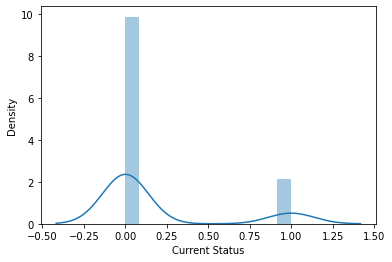

In [184]:
sns.distplot(y_val)

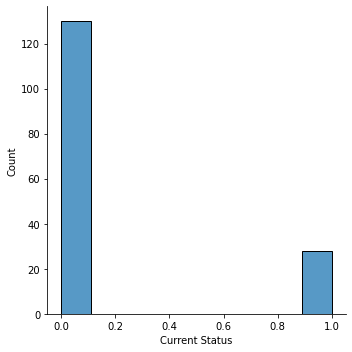

In [185]:
sns.displot(y_val)

In [186]:
from sklearn.utils import class_weight

In [187]:
#pip install xgboost

In [188]:
import xgboost as xgb

In [189]:
from xgboost import XGBClassifier

In [190]:
#pip install scikit-learn

In [191]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [192]:
model = XGBClassifier()
name = 'XGB'

In [193]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring = 'accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

XGB: 0.980977 (0.011885)


In [194]:
#making predictions on validation dataset

from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [195]:
model = XGBClassifier(learning_rate = 1, n_estimator = 1000, max_depth=40, min_child_weight = 40, gamma = 0.4, nthread=10, subsample=0.8, colsample_bytree = .8, objective='binary:logistic', scale_pos_weight=10, seed=29)

model.fit(x_train, y_train)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, model.predict(x_train))

print(auc(false_positive_rate, true_positive_rate))

[22:57:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.9791659548296716


In [196]:
#make prediction:

y_pred = model.predict(x_val)

y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [197]:
print(model.score(x_val,y_val))

0.9683544303797469


In [198]:
df = pd.DataFrame({'Actual':y_val, 'Predicted':y_pred})
df

,Actual,Predicted
689,0,0
243,0,0
382,0,0
531,0,1
409,0,0
...,...,...
421,0,0
360,0,0
277,0,0
511,0,0


In [199]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[125,   5],
       [  0,  28]], dtype=int64)

In [236]:
(28/125)*100

22.400000000000002

In [200]:
print("Accuracy:", metrics.accuracy_score(y_val,y_pred))
print("Precision:", metrics.precision_score(y_val,y_pred))
print("Recall:", metrics.recall_score(y_val,y_pred))

Accuracy: 0.9683544303797469
Precision: 0.8484848484848485
Recall: 1.0


In [201]:
print(Counter(y_pred))

Counter({0: 125, 1: 33})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

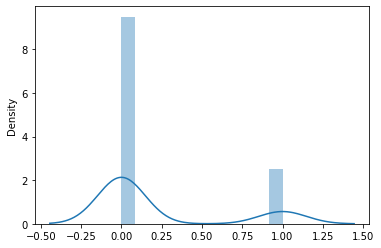

In [202]:
sns.distplot(y_pred)

In [203]:
#predict on test data
pred = model.predict(x_test)

pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

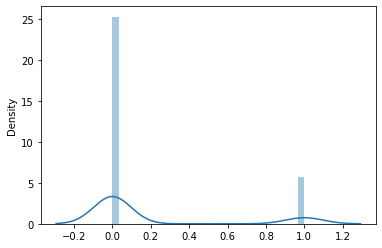

In [204]:
sns.distplot(pred)

In [205]:
print(Counter(pred))

Counter({0: 795, 1: 178})


In [206]:
#predicting probability

probability = model.predict_proba(x_test)[:,1]

probability

array([0.29485467, 0.29485467, 0.29485467, 0.94976354, 0.29485467,
       0.07433961, 0.07433961, 0.07433961, 0.29485467, 0.29485467,
       0.29485467, 0.07433961, 0.07433961, 0.07433961, 0.94976354,
       0.07433961, 0.29485467, 0.07433961, 0.07433961, 0.07433961,
       0.07433961, 0.07433961, 0.07433961, 0.07433961, 0.07433961,
       0.07433961, 0.07433961, 0.07433961, 0.07433961, 0.07433961,
       0.07433961, 0.07433961, 0.07433961, 0.07433961, 0.07433961,
       0.07433961, 0.07433961, 0.07433961, 0.9646284 , 0.07433961,
       0.07433961, 0.07433961, 0.07433961, 0.9646284 , 0.07433961,
       0.07433961, 0.07433961, 0.29485467, 0.07433961, 0.07433961,
       0.37623447, 0.07433961, 0.07433961, 0.07433961, 0.9646284 ,
       0.07433961, 0.07433961, 0.07433961, 0.07433961, 0.07433961,
       0.07433961, 0.07433961, 0.94976354, 0.94976354, 0.94976354,
       0.07433961, 0.07433961, 0.07433961, 0.94976354, 0.07433961,
       0.07433961, 0.29485467, 0.07433961, 0.07433961, 0.96462

In [207]:
#prepare submission

final_result = pd.DataFrame({'STAFF': data_test.STAFF, 'Current Status': probability})
final_result

,STAFF,Current Status
0,0,0.294855
1,0,0.294855
2,0,0.294855
3,0,0.949764
4,0,0.294855
...,...,...
968,0,0.074340
969,0,0.074340
970,0,0.074340
971,0,0.074340


In [208]:
# Add a column for the predicted class in the test data set
test_data['Probability']=probability

In [209]:
import matplotlib
import matplotlib.pyplot as pyplot

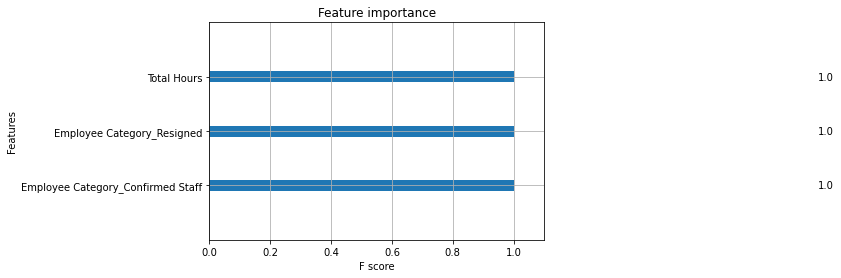

In [210]:
# plot feature importance
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

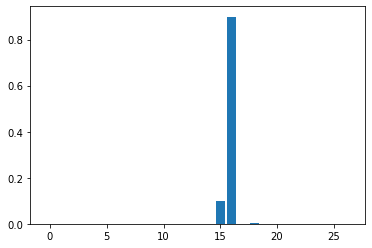

In [211]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [212]:
final_result.to_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\Result.csv',index=False)

In [213]:
Result = pd.read_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\Result.csv')
Result

,STAFF,Current Status
0,0,0.294855
1,0,0.294855
2,0,0.294855
3,0,0.949764
4,0,0.294855
...,...,...
968,0,0.074340
969,0,0.074340
970,0,0.074340
971,0,0.074340


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

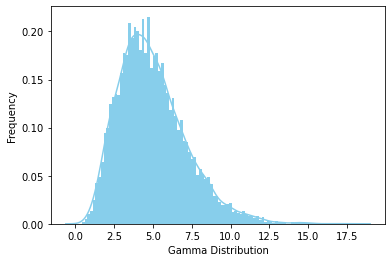

In [214]:
from scipy.stats import gamma
Result = gamma.rvs(a=5, size=10000)

ax = sns.distplot(Result,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

In [215]:
#df_prob = pd.DataFrame(probability)
#df_prob.to_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\probability result.csv',index=False)

In [216]:
test_data.to_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\probability result.csv',index=False)

In [217]:
Result_final = pd.read_csv(r'C:\\Users\\Indira\\Downloads\\Jupiter\\HRAnalytics\\xyz corp\\probability result.csv')
Result_final

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years,Probability
0,0,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2080,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,17.497964,0.294855
1,0,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2080,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,18.834062,0.294855
2,0,PC - 2,Level A1,Location 7,Client Service Staff,others,0,2080,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,17.161201,0.294855
3,0,PC - 3,Level A1,Location 1,Client Service Staff,Resigned,1,1840,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,17.413089,0.949764
4,0,PC - 1,Level A1,Location 3,Client Service Staff,others,0,2080,1812.0,428.0,260.0,8.0,1237.0,470.0,0.236203,15.751179,0.294855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,PC - 1,Level 8,Location 3,Client Service Staff,Confirmed Staff,0,80,-40.0,0.0,0.0,120.0,0.0,0.0,0.000000,0.000000,0.074340
969,0,PC - 1,Level 7,Location 3,Client Service Staff,Confirmed Staff,0,40,24.0,0.0,8.0,8.0,0.0,24.0,0.000000,0.000000,0.074340
970,0,PC - 3,Level 8,Location 1,Client Service Staff,Confirmed Staff,0,40,9.0,0.0,8.0,23.0,0.0,9.0,0.000000,0.000000,0.074340
971,0,PC - 3,Level 7,Location 1,Client Service Staff,Confirmed Staff,0,40,0.0,0.0,8.0,32.0,0.0,0.0,0.000000,0.000000,0.074340


In [218]:
Result_final.sort_values(by = ['Probability'], ascending = False)

,STAFF,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Total Work Hours,Total Leave Hours,Total Training Hours,Total BD Hours,Total NC Hours,Total Utilization%,No.of Working Years,Probability
437,0,PC - 1,Level 7,Location 3,Client Service Staff,Resigned,1,760,720.0,720.0,40.0,0.0,0.0,0.0,1.000000,1.503111,0.964628
509,0,PC - 3,Level 7,Other Loc,Client Service Staff,Resigned,1,600,584.0,584.0,16.0,0.0,0.0,0.0,1.000000,1.084211,0.964628
129,0,PC - 3,Level 6,Location 1,Client Service Staff,Resigned,1,0,0.0,-32.0,0.0,0.0,0.0,0.0,0.000000,3.000746,0.964628
229,0,PC - 3,Level 7,Location 1,Client Service Staff,Resigned,1,344,344.0,0.0,0.0,0.0,0.0,360.0,0.000000,2.499709,0.964628
399,0,PC - 3,Level 8,Other Loc,Client Service Staff,Resigned,1,632,598.0,376.0,16.0,18.0,0.0,238.0,0.628763,1.497635,0.964628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,PC - 2,Level 7,Other Loc,Client Service Staff,Confirmed Staff,0,2080,1730.5,1459.0,336.0,13.5,0.0,287.5,0.843109,2.332697,0.074340
381,0,PC - 2,Level A1,Location 7,Client Service Staff,Confirmed Staff,0,2080,1756.0,324.9,296.0,28.0,817.5,638.1,0.185023,2.332697,0.074340
382,0,PC - 4,Level A1,Location 7,Support Staff,Confirmed Staff,0,1040,952.0,0.0,88.0,0.0,0.0,1032.0,0.000000,2.332697,0.074340
383,0,PC - 2,Level 7,Location 7,Client Service Staff,Confirmed Staff,0,2080,1904.0,1450.0,176.0,0.0,12.0,450.0,0.761555,2.332697,0.074340


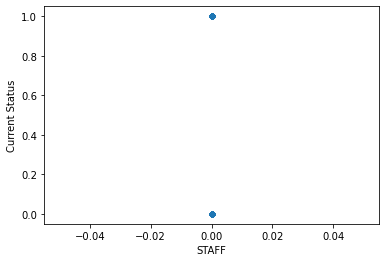

In [219]:
Result_final.plot(kind="scatter", x="STAFF", y="Current Status")
plt.show()

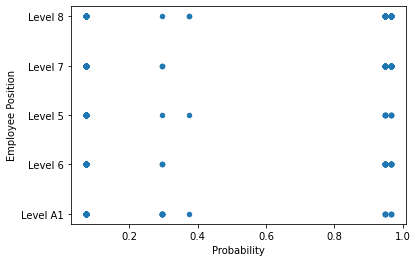

In [220]:
Result_final.plot(kind="scatter", x="Probability", y="Employee Position")
plt.show()

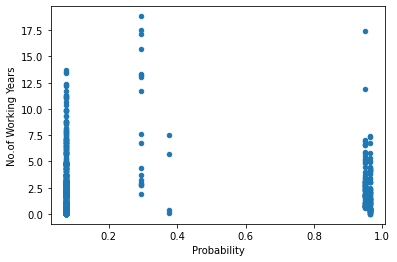

In [221]:
Result_final.plot(kind="scatter", x="Probability", y="No.of Working Years")
plt.show()

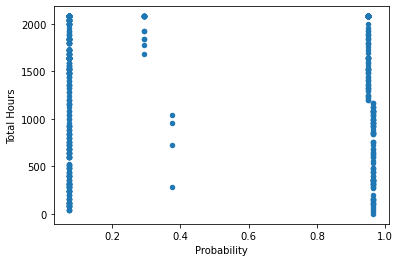

In [222]:
Result_final.plot(kind="scatter", x="Probability", y="Total Hours")
plt.show()

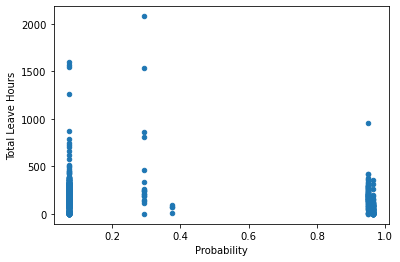

In [223]:
Result_final.plot(kind="scatter", x="Probability", y="Total Leave Hours")
plt.show()

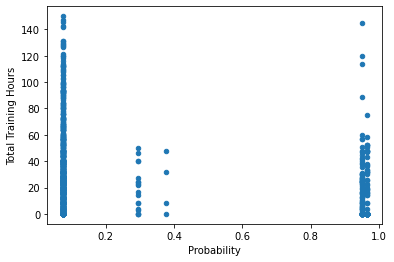

In [224]:
Result_final.plot(kind="scatter", x="Probability", y="Total Training Hours")
plt.show()

In [225]:
Result_final['Current Status'] = np.where(Result_final['Probability'] >= 0.5, 1, 0)

In [226]:
Result_final['Current Status'].value_counts()

0    795
1    178
Name: Current Status, dtype: int64

In [237]:
(178/795)*100

22.38993710691824

out of 973 employees 178 could resign which is 18.29%